See call_so.ipynb for information on compiling.

In [24]:
# needed for C stdout
%load_ext wurlitzer

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [25]:
import ctypes as ct
import os
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# load xpp api compiled with libX11.so
xppa = ct.cdll.LoadLibrary('../xpp_source/libxppAPI.so')

In [27]:
# figure out how to initialize input array in python to pass into c
arr = (ct.c_char_p*3)()
home = os.path.expanduser("~")
arr[0] = (home+'/Dropbox/xpp-py/xpp_source/xppaut').encode('utf-8')
arr[1] = (home+'/Dropbox/xpp-py/xpp_source/ode/lecar.ode').encode('utf-8')
arr[2] = '-silent'.encode('utf-8')

In [28]:
xppa.do_main_py(3,arr)

argv[0] = /home/youngmp/Dropbox/xpp-py/xpp_source/xppaut
argv[1] = /home/youngmp/Dropbox/xpp-py/xpp_source/ode/lecar.ode
argv[2] = -silent
myfile=lecar.ode
batchout=output.dat
PlotFormat=ps
text=                Channnels for the ML Eqns   
text= The ML eqns have three channels Calcium, potassium and leak.    
text= To set parameters click on the asterisks   
text=*  We first set the integration time to 100 and increase the current   
action=$ total=100 iapp=.1  
text= Integrate the equations and see the nice limit cycle. Draw the nullclines.   
text=*  Now we block potassium. Integrate again and look at what happens   
action=$ gk=0  
text= Draw the nullclines. Where is the V nullcline?   
text=*  Now we block both currents and integrate   
action=$ gk=0 gca=0  
text=*  Now calcium is blocked. Explore this   
action=$ gk=2 gca=0  
text=*  Back to normal.  Both currents are required for oscillations!   
action=$ gk=2 gca=1.33  
text=*   What happens with no leak???    
action=$ gl=0  
P

0

Version should be below here?
Version should be above here?


In [29]:
# The helper function "ndpointer" can declare the expected type
# and either number of dimensions expected or the shape of the
# numpy array.  ctypes will then require that array and type check
# the parameter. 
xppa.integrate_once_py.argtypes = np.ctypeslib.ndpointer(dtype=ct.c_float,ndim=1),
xppa.integrate_once_py.restype = None

#x_spots = np.arange(-1, 2, 1, dtype=ct.c_float)
#dll.func(x_spots, len(x_spots))

In [30]:
xppa.integrate_once_py(np.array([.01,-1],dtype=ct.c_float))

In [32]:
maxrow = xppa.get_maxrow_browser()
maxcol = xppa.get_maxcol_browser()

data_all = np.zeros((maxrow,maxcol))
for i in range(maxcol):
    col_dat_addr = xppa.get_data_col(i)
    data_all[:,i] = list(ct.cast(col_dat_addr,ct.POINTER(ct.c_float*maxrow)).contents)

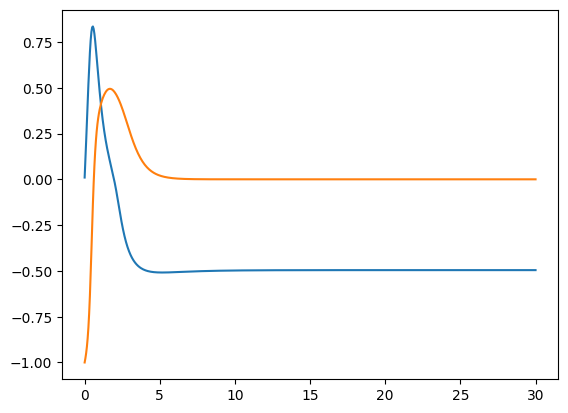

In [33]:
fig,axs = plt.subplots(1,1)
axs.plot(data_all[:,0],data_all[:,1])
axs.plot(data_all[:,0],data_all[:,2])
plt.show()